In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'E:\ML\Datasets\wine.csv')

In [5]:
df.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.shape

(178, 14)

In [7]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wine', ylabel='count'>

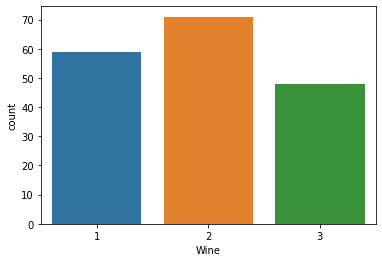

In [12]:
sns.countplot(df['Wine'])

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('Wine',axis=1),df['Wine'],test_size=0.30,random_state=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model=KNeighborsClassifier(n_neighbors=18,p=2)

In [28]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=18)

In [29]:
ypred=model.predict(xtest)

In [30]:
print(ypred)

[3 2 3 3 1 3 2 1 2 2 1 3 2 1 3 2 2 1 2 1 1 2 3 1 3 3 1 1 1 3 2 3 2 1 3 2 2
 3 2 1 1 2 2 3 1 1 3 1 1 1 2 3 2 1]


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.7222222222222222

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[20,  0,  3],
       [ 1, 13,  5],
       [ 0,  7,  5]], dtype=int64)

In [21]:
lacc=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    lacc.append(accuracy_score(ytest,model.predict(xtest)))
print(lacc)

[0.7407407407407407, 0.6666666666666666, 0.7407407407407407, 0.6666666666666666, 0.7037037037037037, 0.5925925925925926, 0.6481481481481481, 0.6666666666666666, 0.6851851851851852, 0.6666666666666666, 0.7037037037037037, 0.6851851851851852, 0.7037037037037037, 0.7037037037037037, 0.7037037037037037, 0.7037037037037037, 0.7407407407407407, 0.7222222222222222, 0.7222222222222222, 0.7407407407407407, 0.6666666666666666, 0.7037037037037037, 0.6851851851851852, 0.7222222222222222, 0.7037037037037037, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7407407407407407, 0.7222222222222222, 0.6851851851851852, 0.6851851851851852, 0.6666666666666666, 0.7037037037037037, 0.7222222222222222, 0.7037037037037037, 0.7037037037037037, 0.7037037037037037, 0.7037037037037037]


In [52]:
import matplotlib.pyplot as plt

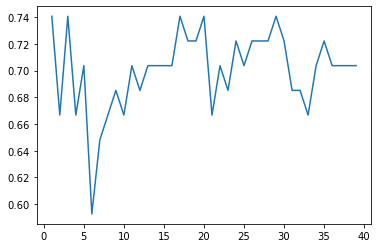

In [53]:
plt.plot(np.arange(1,40),lacc)

#### Using Standard Data

In [33]:
from sklearn.datasets import load_wine
data=load_wine()

In [34]:
df=pd.DataFrame(data['data'],columns=data['feature_names'])

In [35]:
df['Target']=pd.DataFrame(data['target'])

In [37]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [39]:
df.shape

(178, 14)

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('Target',axis=1),df['Target'],test_size=0.30,random_state=1)

In [42]:
from sklearn.svm import SVC

In [43]:
svc=SVC()

In [44]:
svc.fit(xtrain,ytrain)

SVC()

In [45]:
ypred = svc.predict(xtest)

In [46]:
accuracy_score(ytest,ypred)

0.6851851851851852

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)
accuracy_score(ytest,ypred)

0.9814814814814815

In [48]:
confusion_matrix(ytest,ypred)

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]], dtype=int64)